## Pixel Transformation
- Pixel Transformation are operation perform one pixel at a time.
- Histrogram display the intensity of the image and can be used to optimize image characteristics.
- Intensity transformation changes a image one pixel at a time.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1,image_2,title_1='original',title_2='New Image'):
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(image_1,cmap='gray')
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2,cmap='gray')
    plt.title(title_2)
    plt.show()

In [3]:
def plot_hist(old_image,new_image,title_old='old image',title_new='new image'):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1,2,2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    #image,image channel we want to calculate here grayscale image,no of chnaeel
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()
    

### Histrograms
- A histrogram counts the number of occurances of intensity  values of pixels, and it's a useful tool for understanding and manipulating image. we use cv2.calHist() to generate the histrogram. 
- cv2.calhist(cv array[image],[0] this is the image channel,

# Grayscale histrogram
- Histrogram are used in grayscale images. Grayscale images are used in many applications, including medicall and industrial. Color images are split into luminance and chrominance. the luminance is the grayscale portion and is usually processed in many applications

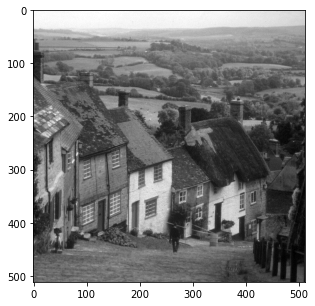

In [4]:
goldhill=cv2.imread('goldhill.bmp',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(goldhill,cmap='gray')
plt.show()

In [5]:
hist=cv2.calcHist([goldhill],[0],None,[256],[0,256])

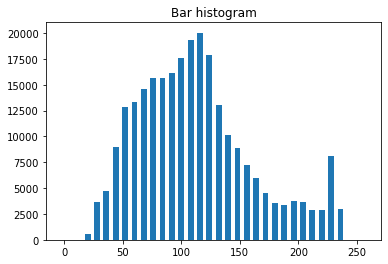

In [6]:
#We can plot it as a bar graph, the  𝑥 axis are the pixel intensities and the  𝑦axis is the number of times of occurrences that the corresponding pixel intensity value on  𝑥 axis occurred.

intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

### Brightness and contrast adjustments
- we can use multiplication by a(alpha) for contrast and addition by b(beta) to improve broghtness control. This applies the intensity transformation as well. The image f(x,y) and the transformed image is g(x,y) where g(x,y)=af(x,y)+B(beta)
- Rather than implementing via array operations,we use the function convertScaleAbs. it scales,calculates absolute values, and convert the result to 8-bit so the values fall between[0,255]. For brightness control, we can set ato 1, and  B to 100: 

In [7]:
alpha=1
beta=100
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

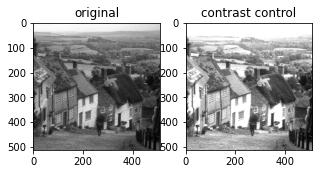

In [8]:
#we can plot the brighter image,it's much brighter
plot_image(goldhill,new_image,"original",'contrast control')

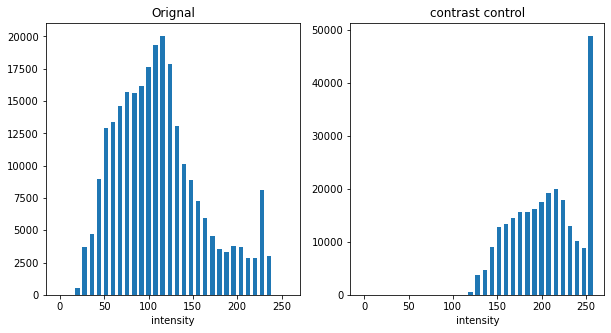

In [9]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

- When plotting the image we see it's too bright. we can adapt the brightness by making the image darker and increasing the contrast at the same time.

In [10]:
plt.figure(figsize=(10,5))
alpha=3#simple contrast control
beta=-200 #simple brightness control
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

<Figure size 720x360 with 0 Axes>

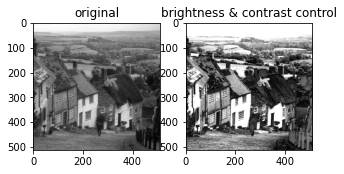

In [11]:
plot_image(goldhill,new_image,'original','brightness & contrast control')


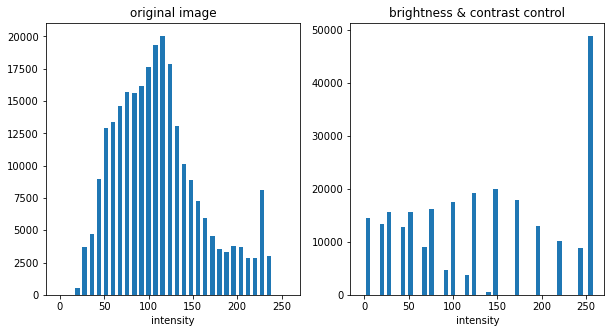

In [12]:
plt.figure(figsize=(10,5))
plot_hist(goldhill,new_image,'original image','brightness & contrast control')

- There are other nonlinear methods to improve contrast and brightness, These methods have different seets of parameters. In general it's difficult to manually adjust the contrast and brightness parameter, but there are algorithm that improve contrast automatically.

### Histrogram Equalization
- Histrogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels. it does this by flatting the histrogram. we simply apply the function cv2.equalizeHist

In [13]:
zelda=cv2.imread('zelda.png',cv2.IMREAD_GRAYSCALE)
new_image=cv2.equalizeHist(zelda)

- we can compare the image before and after Histrogram Equalization, we see the contrast is improved.

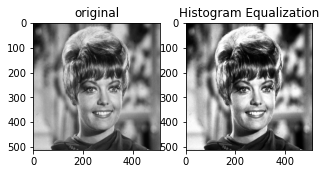

In [14]:
plot_image(zelda,new_image,'original','Histogram Equalization')


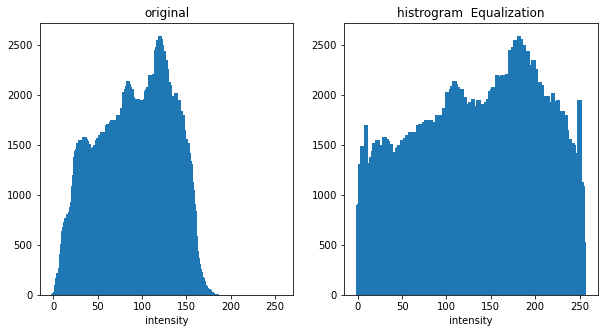

In [15]:
plt.figure(figsize=(10,5))
plot_hist(zelda,new_image,'original','histrogram  Equalization')

### Thresholding and Simple Segmentation
- Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many application including extracting text,medical imaging, and industrial imaging. Thresholding an image takes a threshold; 
- If a particular pixel(i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. 

In [16]:
def thresholding(input_img,threshold,max_value=255,min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
    
    for i in range(N):
        for j in range(M):
            if input_img[i,j]>threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
    return image_out

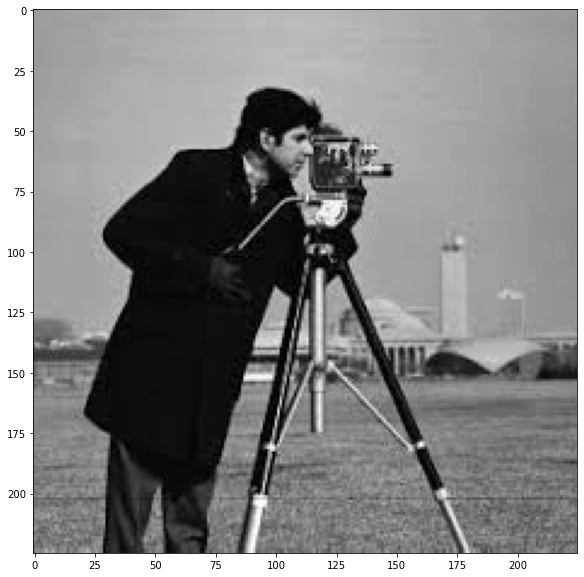

In [17]:
image=cv2.imread('cameraman.jpeg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')
plt.show()

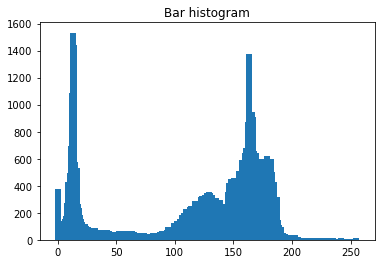

In [18]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [19]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

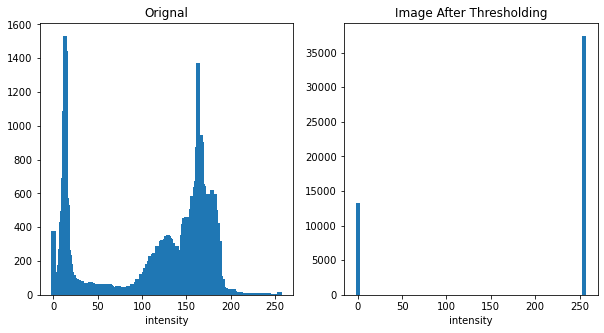

In [20]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

- The Function cv.threshold Applies a threshold to the gray image, with the following parameters
  - cv.threshold(grayscale image,threshold value, maximum value to use,thresholding type)
- The parameter thresholding type is the type of thresholding,we would like to perform. for example we have basic thresholding cv2.THRESH_BINARY 
  

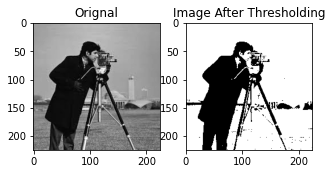

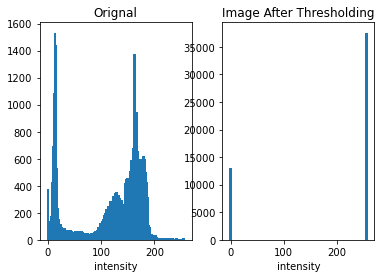

In [27]:
ret, new_image = cv2.threshold(image,84,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

- ret is the threshold value and new_image is the image after thresholding has been applied. There are different threshold type, for example, cv2.THRESH_TUNC will not change the values if the pixels are less than the threshold value
- we see that darker element have not changed and the lighter values are set to 255

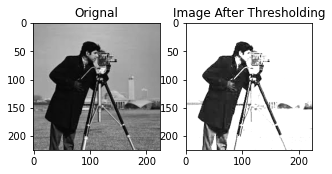

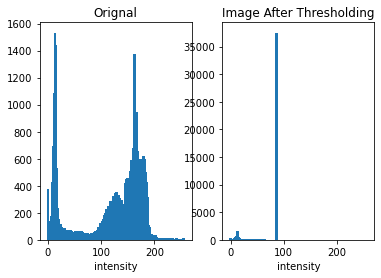

86.0


In [28]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")


- ostu's method cv2.THRESH_OTSU avoids having to choose a value and determines it automatically,using histrogram


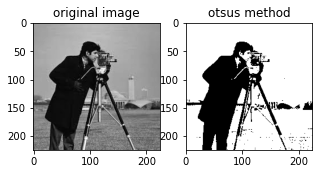

In [29]:
ret,otsu=cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,'original image','otsus method')

In [31]:
ret# here we can see that it automatically choosen the threshold value

88.0